# Time Series Forecasting with ARIMAX, SARIMAX and PROPHET
## by Vesna Pop-Dimitrijoska
---

WebTrafic dataset, device: **DESKTOP**

---

# Task

Time Series Forecasting with ARIMA, SARIMA and PROPHET the Web Traffic dataset for each device type (separately) and forecast the total cumulaive traffic. 

---
## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns

#Time-series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import ParameterGrid

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df_org = pd.read_csv('df_desktop_final.csv',index_col=0, parse_dates=['Date'])
df = df_org.copy()

## Train-test split

In [3]:
# Train-test split 
train_desktop = df.loc[df.index <  pd.Timestamp('2018-04-01')]
test_desktop  = df.loc[df.index >= pd.Timestamp('2018-04-01')]

In [4]:
train = train_desktop.shape[0]
test = test_desktop.shape[0]
print('print(train):', train_desktop.shape)
print('print(test):', test_desktop.shape)
print(f'\ntrain / test -> {round(train/(train + test)*100,2)}% / {round(test/(train + test)*100,2)}%')

print(train): (1551, 1)
print(test): (184, 1)

train / test -> 89.39% / 10.61%


In [5]:
# Generate all different combinations of p, q and q triplets

p = range(0, 15)
d = range(0, 4)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

---
## Time Series Forecasting with ARIMA

In [6]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order
    model_ARIMA = ARIMA(train_desktop['Sessions'],
                  exog=None,
                  order=(p, d, q),
                  seasonal_order=(0, 0, 0, 0), 
                  trend=None, 
                  enforce_stationarity=True, 
                  freq='1D')

    
    results = model_ARIMA.fit()
    results = results.forecast(steps=len(test_desktop))
    
    mape = mean_absolute_percentage_error(test_desktop['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 3.0%
(p, d, q) order: (0, 0, 1), with MAPE = 2.98%
(p, d, q) order: (0, 0, 2), with MAPE = 2.98%
(p, d, q) order: (0, 0, 3), with MAPE = 2.98%
(p, d, q) order: (0, 1, 0), with MAPE = 4.5%
(p, d, q) order: (0, 1, 1), with MAPE = 5.59%
(p, d, q) order: (0, 1, 2), with MAPE = 2.67%
(p, d, q) order: (0, 1, 3), with MAPE = 2.66%
(p, d, q) order: (0, 2, 0), with MAPE = 583.02%
(p, d, q) order: (0, 2, 1), with MAPE = 4.56%
(p, d, q) order: (0, 2, 2), with MAPE = 5.71%
(p, d, q) order: (0, 2, 3), with MAPE = 2.67%
(p, d, q) order: (0, 3, 0), with MAPE = 37913.69%
(p, d, q) order: (0, 3, 1), with MAPE = 628.13%
(p, d, q) order: (0, 3, 2), with MAPE = 25.49%
(p, d, q) order: (0, 3, 3), with MAPE = 21.48%
(p, d, q) order: (1, 0, 0), with MAPE = 3.0%
(p, d, q) order: (1, 0, 1), with MAPE = 2.98%
(p, d, q) order: (1, 0, 2), with MAPE = 2.98%
(p, d, q) order: (1, 0, 3), with MAPE = 2.98%
(p, d, q) order: (1, 1, 0), with MAPE = 4.77%
(p, d, q) order: (1, 1, 1),

(p, d, q) order: (11, 0, 1), with MAPE = 2.63%
(p, d, q) order: (11, 0, 2), with MAPE = 2.62%
(p, d, q) order: (11, 0, 3), with MAPE = 2.61%
(p, d, q) order: (11, 1, 0), with MAPE = 1.79%
(p, d, q) order: (11, 1, 1), with MAPE = 1.63%
(p, d, q) order: (11, 1, 2), with MAPE = 1.7%
(p, d, q) order: (11, 1, 3), with MAPE = 1.73%
(p, d, q) order: (11, 2, 0), with MAPE = 8.18%
(p, d, q) order: (11, 2, 1), with MAPE = 1.72%
(p, d, q) order: (11, 2, 2), with MAPE = 1.57%
(p, d, q) order: (11, 2, 3), with MAPE = 1.32%
(p, d, q) order: (11, 3, 0), with MAPE = 7.97%
(p, d, q) order: (11, 3, 1), with MAPE = 10.25%
(p, d, q) order: (11, 3, 2), with MAPE = 20.77%
(p, d, q) order: (11, 3, 3), with MAPE = 15.59%
(p, d, q) order: (12, 0, 0), with MAPE = 2.62%
(p, d, q) order: (12, 0, 1), with MAPE = 2.62%
(p, d, q) order: (12, 0, 2), with MAPE = 2.64%
(p, d, q) order: (12, 0, 3), with MAPE = 2.72%
(p, d, q) order: (12, 1, 0), with MAPE = 1.66%
(p, d, q) order: (12, 1, 1), with MAPE = 1.64%
(p, d, q) o

In [7]:
model_ARIMA = ARIMA(train_desktop['Sessions'],
              exog=None,
              order = (best_order[0], best_order[1], best_order[2]),
              seasonal_order=(0, 0, 0, 0), 
              trend=None, 
              enforce_stationarity=True, 
              freq='1D')

results = model_ARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_desktop))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:                ARIMA(12, 2, 2)   Log Likelihood                 300.342
Date:                Sat, 21 Oct 2023   AIC                           -570.684
Time:                        15:24:28   BIC                           -490.504
Sample:                    01-01-2014   HQIC                          -540.862
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2067      0.199     -6.052      0.000      -1.597      -0.816
ar.L2         -0.8868      0.118     -7.488      0.000      -1.119      -0.655
ar.L3         -0.7873      0.119     -6.624      0.0

In [8]:
y_test = test_desktop['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for ARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for ARIMA model:
--------------------------------------
MAE:    0.18
RMSE:   0.24
R2:     74.49
MAPE:   1.27 %


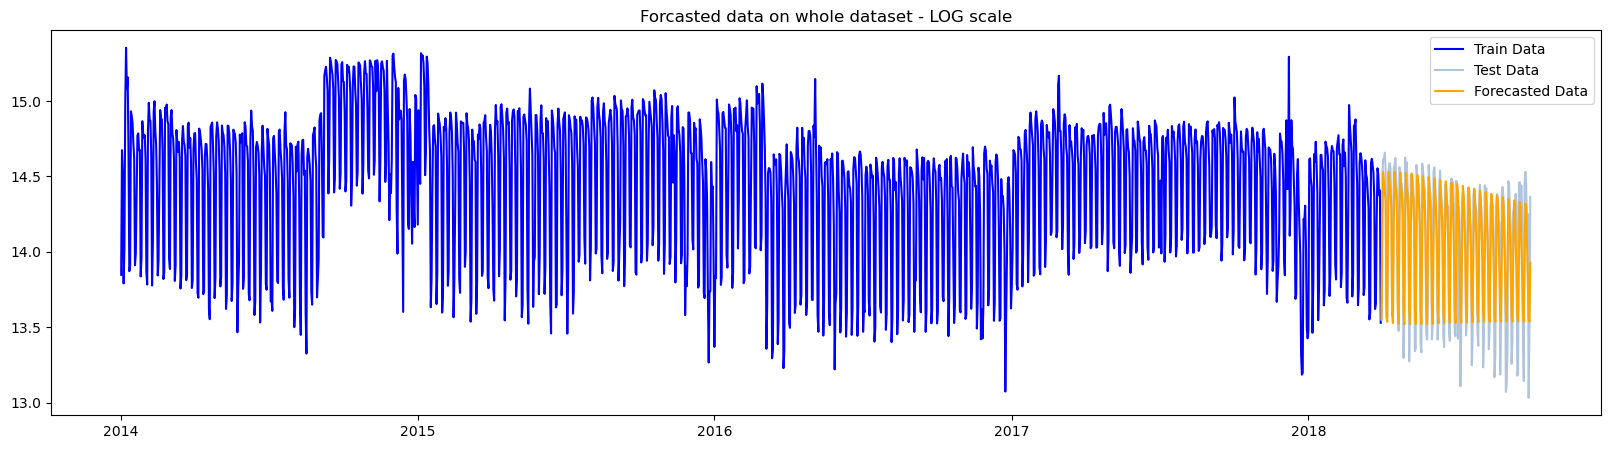

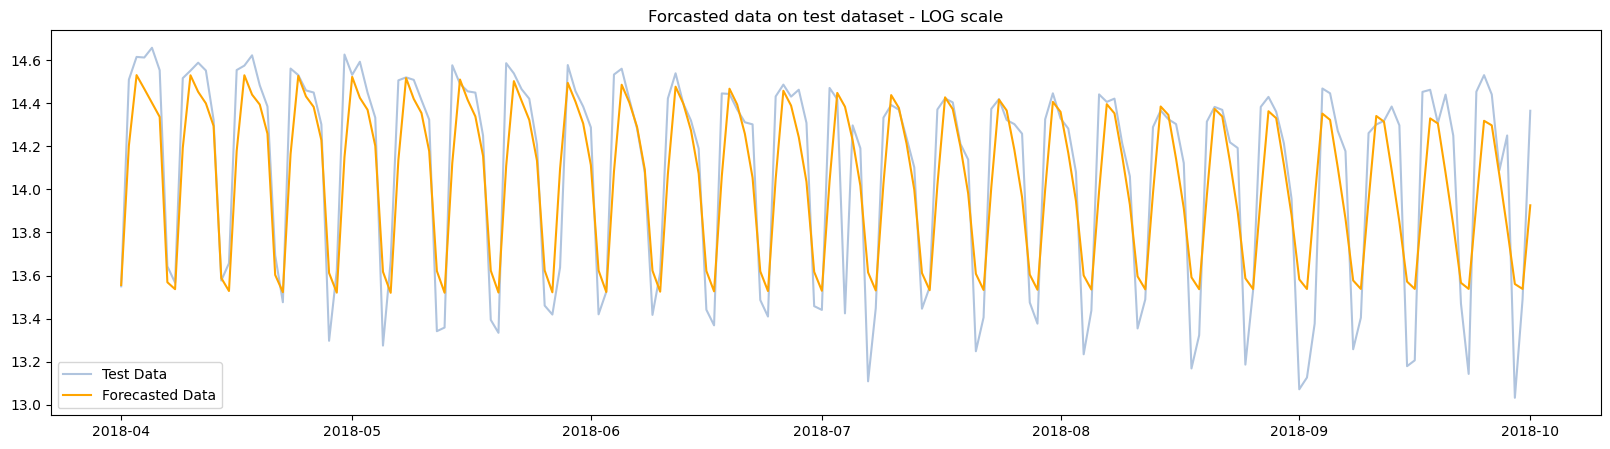

In [9]:
# Forcasted data in LOG scale

Train = train_desktop['Sessions']
Test = test_desktop['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

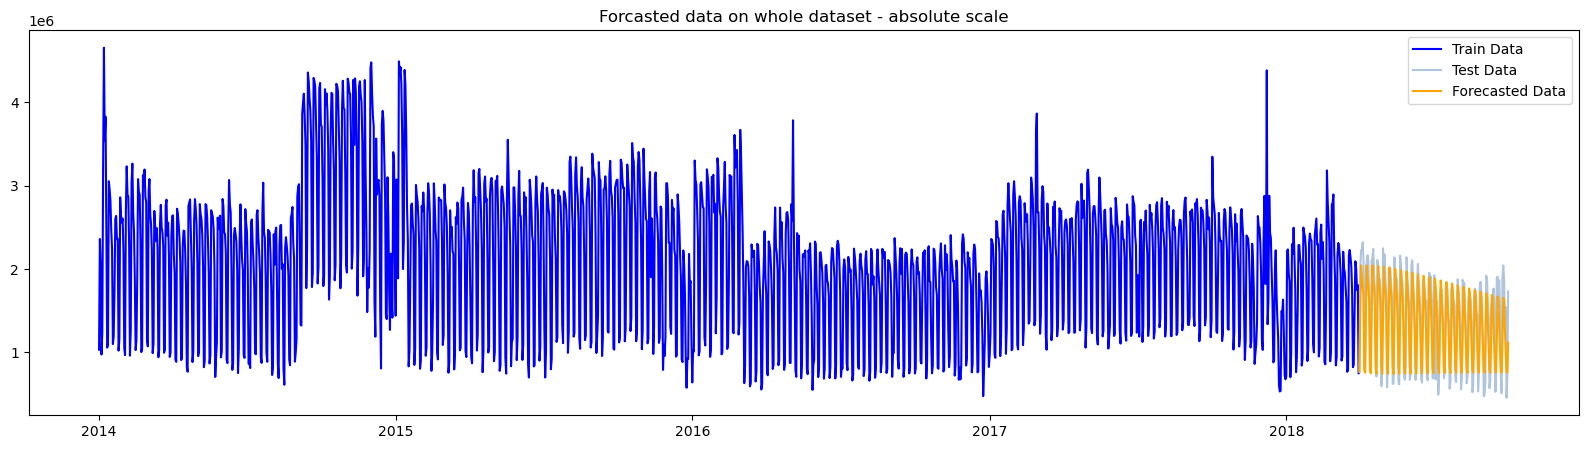

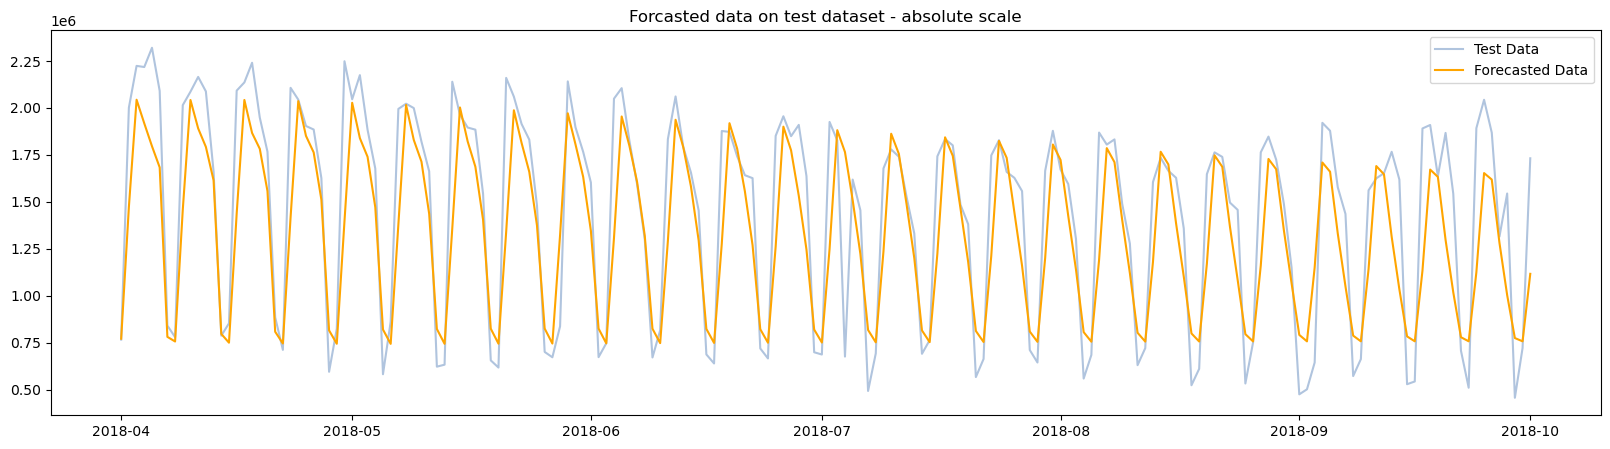

In [10]:
# Forcasted data in absolute scale

Train = np.exp(train_desktop['Sessions'])
Test = np.exp(test_desktop['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

#
---
## Time Series Forecasting with SARIMA

In [12]:
# Generate all different combinations of p, q and q triplets

p = range(0, 15)
d = range(0, 4)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))

In [13]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order

    model_SARIMA = SARIMAX(train_desktop['Sessions'], 
                    exog=None,
                    order=(p, d, q),
                    seasonal_order=(0, 0, 0, 7),
                    trend=None,
                    enforce_stationarity=True,
                    enforce_invertibility=False, 
                    freq='1D')
    
    results = model_SARIMA.fit()
    results = results.forecast(steps=len(test_desktop))
   
    mape = mean_absolute_percentage_error(test_desktop['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 100.0%
(p, d, q) order: (0, 0, 1), with MAPE = 99.75%
(p, d, q) order: (0, 0, 2), with MAPE = 99.52%
(p, d, q) order: (0, 1, 0), with MAPE = 4.5%
(p, d, q) order: (0, 1, 1), with MAPE = 5.59%
(p, d, q) order: (0, 1, 2), with MAPE = 2.67%
(p, d, q) order: (0, 2, 0), with MAPE = 583.02%
(p, d, q) order: (0, 2, 1), with MAPE = 4.56%
(p, d, q) order: (0, 2, 2), with MAPE = 5.71%
(p, d, q) order: (0, 3, 0), with MAPE = 37913.69%
(p, d, q) order: (0, 3, 1), with MAPE = 628.08%
(p, d, q) order: (0, 3, 2), with MAPE = 97.57%
(p, d, q) order: (1, 0, 0), with MAPE = 8.56%
(p, d, q) order: (1, 0, 1), with MAPE = 11.28%
(p, d, q) order: (1, 0, 2), with MAPE = 2.72%
(p, d, q) order: (1, 1, 0), with MAPE = 4.77%
(p, d, q) order: (1, 1, 1), with MAPE = 5.02%
(p, d, q) order: (1, 1, 2), with MAPE = 2.67%
(p, d, q) order: (1, 2, 0), with MAPE = 465.21%
(p, d, q) order: (1, 2, 1), with MAPE = 4.84%
(p, d, q) order: (1, 2, 2), with MAPE = 5.13%
(p, d, q) order: (1,

(p, d, q) order: (14, 2, 2), with MAPE = 1.5%
(p, d, q) order: (14, 3, 0), with MAPE = 49.94%
(p, d, q) order: (14, 3, 1), with MAPE = 7.08%
(p, d, q) order: (14, 3, 2), with MAPE = 9.28%
-------------------------------------------------
Best model:
(p, d, q) -> (13, 1, 1) with MAPE = 1.34%


In [14]:
model_SARIMA = SARIMAX(train_desktop['Sessions'], 
                exog=None,
                order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(0, 0, 0, 7),
                trend=None,
                enforce_stationarity=True,
                enforce_invertibility=False, 
                freq='1D')

results = model_SARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_desktop))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:              SARIMAX(13, 1, 1)   Log Likelihood                 393.124
Date:                Sat, 21 Oct 2023   AIC                           -756.248
Time:                        20:02:56   BIC                           -676.058
Sample:                    01-01-2014   HQIC                          -726.424
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7742      0.055    -14.042      0.000      -0.882      -0.666
ar.L2         -0.6545      0.036    -18.362      0.000      -0.724      -0.585
ar.L3         -0.5648      0.041    -13.735      0.0

In [15]:
y_test = test_desktop['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for SARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for SARIMA model:
--------------------------------------
MAE:    0.19
RMSE:   0.24
R2:     73.66
MAPE:   1.34 %


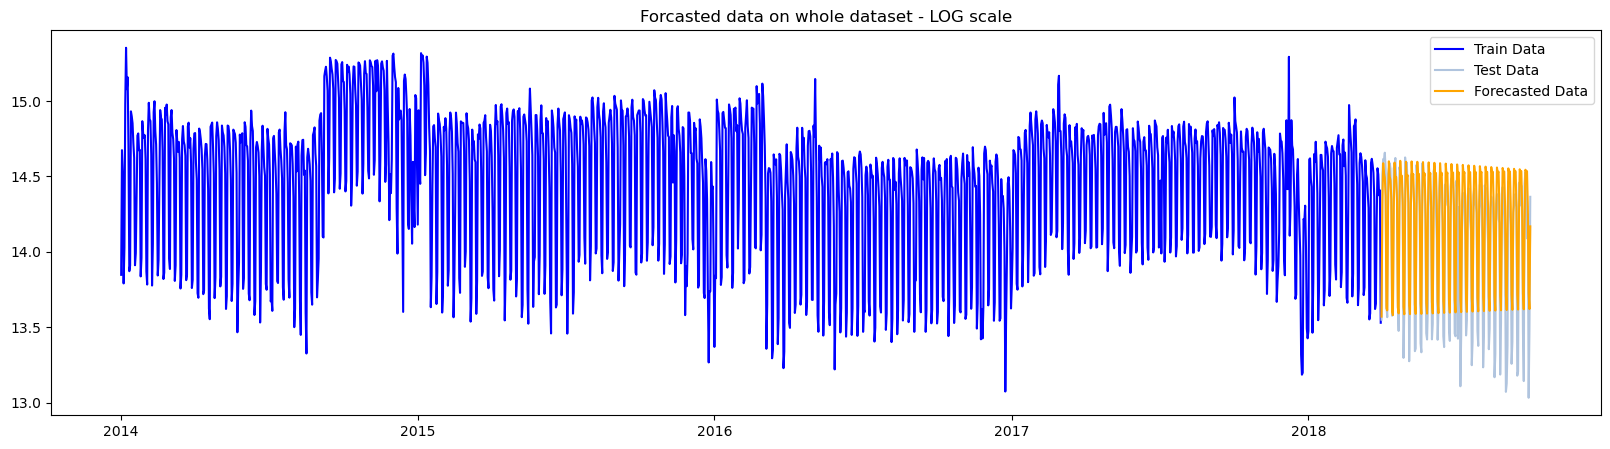

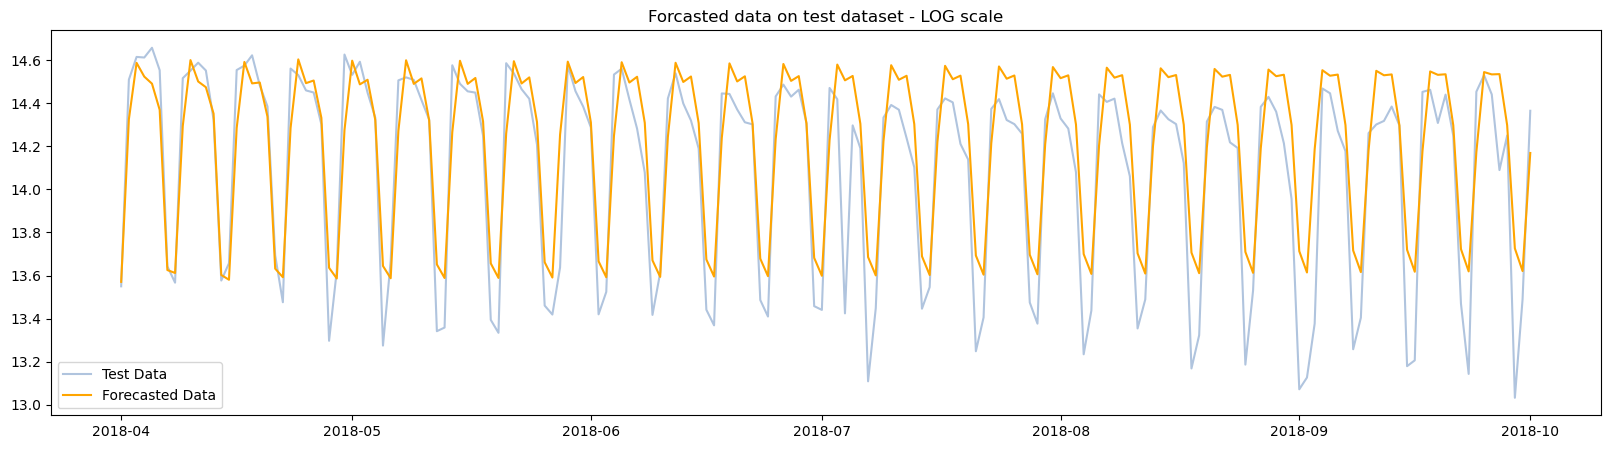

In [16]:
# Forcasted data in LOG scale

Train = train_desktop['Sessions']
Test = test_desktop['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

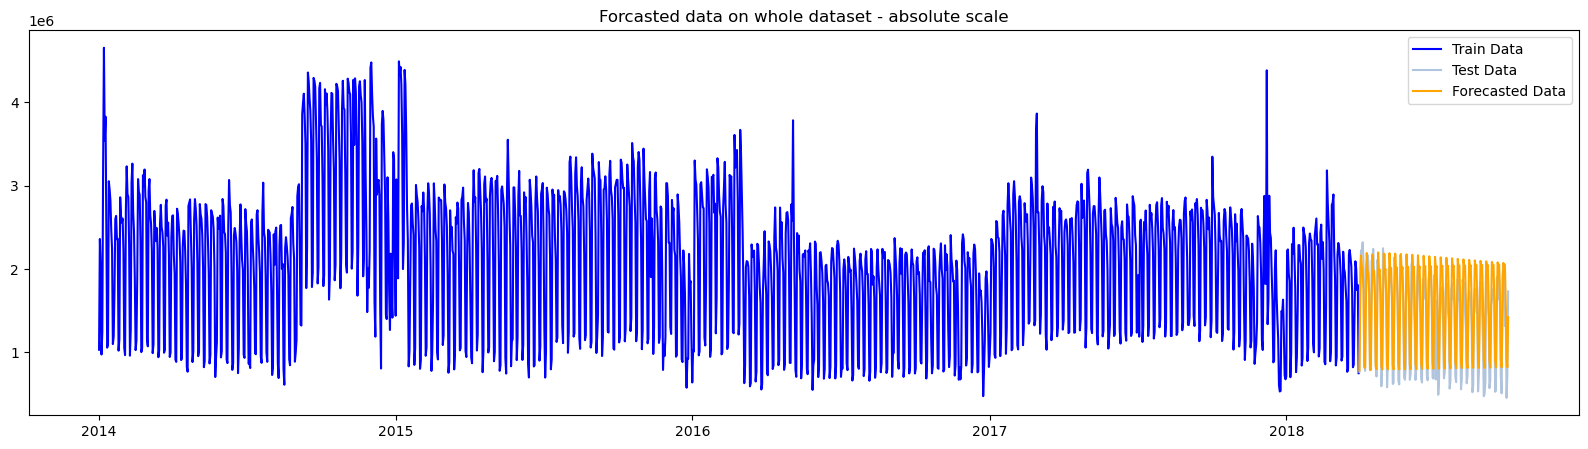

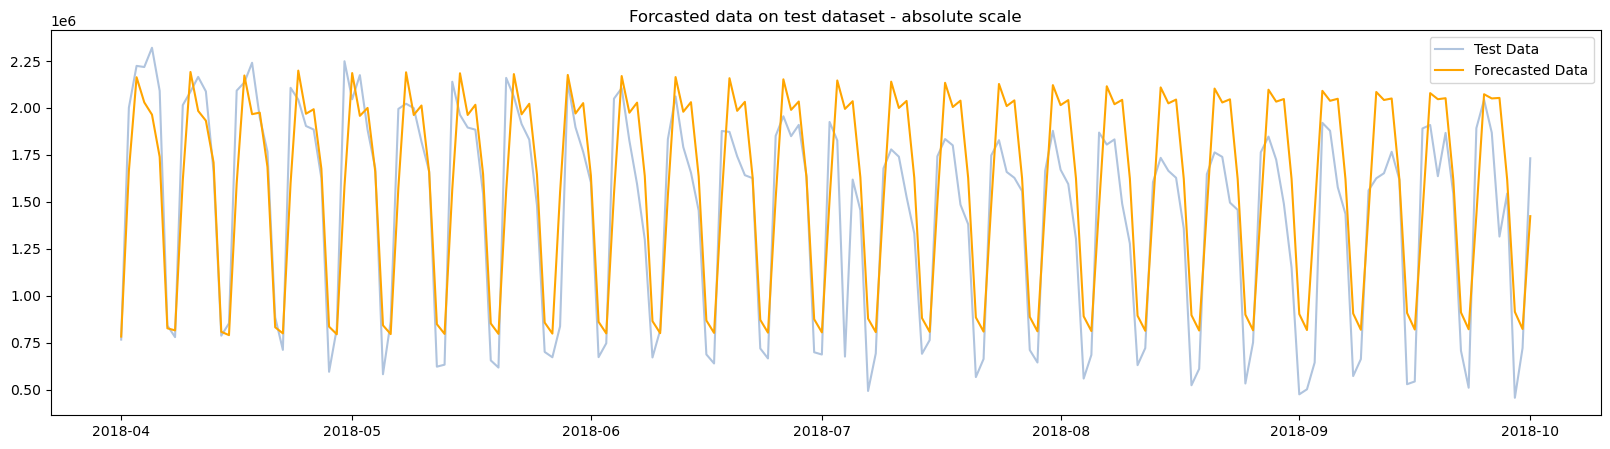

In [17]:
# Forcasted data in absolute scale

Train = np.exp(train_desktop['Sessions'])
Test = np.exp(test_desktop['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

#
---
## Time Series Forecasting with PROPHET

In [18]:
df_org = pd.read_csv('df_desktop_final.csv', parse_dates=['Date'])
df = df_org.copy()

In [19]:
df.rename(columns={'Date': 'ds', 'Sessions': 'y'}, inplace=True)

In [20]:
# Train-test split 
train_desktop = df.loc[df['ds'] <  pd.Timestamp('2018-04-01')]
test_desktop  = df.loc[df['ds'] >= pd.Timestamp('2018-04-01')]

In [21]:
parameters = {
    'n_changepoints': [10, 13, 14, 15, 16, 17, 18, 20], 
    'changepoint_range': np.arange(0.80, 0.90, 0.01)}

parameter_grid = ParameterGrid(parameters)

best_mape = float('inf')
best_parameters = None

for param_set in parameter_grid:
    n_changepoints = param_set['n_changepoints']
    changepoint_range = param_set['changepoint_range']
    
    model = prophet.Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=n_changepoints,
        changepoint_range=changepoint_range,
        yearly_seasonality='auto',
        weekly_seasonality='auto',
        daily_seasonality='auto',
        holidays=None
    )
    
    model.fit(train_desktop)
    
    future = model.make_future_dataframe(periods=test_desktop.shape[0], freq='D')
    results = model.predict(future)
    
    mape = mean_absolute_percentage_error(test_desktop['y'], results['yhat'][-len(test_desktop['y']):])
    
    print(f'MAPE = {round(mape*100, 2)}% - n_changepoints = {n_changepoints}, changepoint_range = {changepoint_range}')
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = param_set

print(f'Best parameters: {best_parameters}, MAPE = {round(best_mape*100, 2)}%')


20:03:25 - cmdstanpy - INFO - Chain [1] start processing
20:03:25 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.79% - n_changepoints = 10, changepoint_range = 0.8


20:03:26 - cmdstanpy - INFO - Chain [1] start processing
20:03:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.89% - n_changepoints = 13, changepoint_range = 0.8


20:03:27 - cmdstanpy - INFO - Chain [1] start processing
20:03:28 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.75% - n_changepoints = 14, changepoint_range = 0.8


20:03:29 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 15, changepoint_range = 0.8


20:03:31 - cmdstanpy - INFO - Chain [1] start processing
20:03:31 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.18% - n_changepoints = 16, changepoint_range = 0.8


20:03:32 - cmdstanpy - INFO - Chain [1] start processing
20:03:33 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.83% - n_changepoints = 17, changepoint_range = 0.8


20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.8% - n_changepoints = 18, changepoint_range = 0.8


20:03:36 - cmdstanpy - INFO - Chain [1] start processing
20:03:36 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.9% - n_changepoints = 20, changepoint_range = 0.8


20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.85% - n_changepoints = 10, changepoint_range = 0.81


20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.75% - n_changepoints = 13, changepoint_range = 0.81


20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:40 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.9% - n_changepoints = 14, changepoint_range = 0.81


20:03:42 - cmdstanpy - INFO - Chain [1] start processing
20:03:42 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.84% - n_changepoints = 15, changepoint_range = 0.81


20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.89% - n_changepoints = 16, changepoint_range = 0.81


20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.74% - n_changepoints = 17, changepoint_range = 0.81


20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 18, changepoint_range = 0.81


20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.96% - n_changepoints = 20, changepoint_range = 0.81


20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.79% - n_changepoints = 10, changepoint_range = 0.8200000000000001


20:03:51 - cmdstanpy - INFO - Chain [1] start processing
20:03:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.82% - n_changepoints = 13, changepoint_range = 0.8200000000000001


20:03:53 - cmdstanpy - INFO - Chain [1] start processing
20:03:53 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.95% - n_changepoints = 14, changepoint_range = 0.8200000000000001


20:03:55 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.77% - n_changepoints = 15, changepoint_range = 0.8200000000000001


20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.73% - n_changepoints = 16, changepoint_range = 0.8200000000000001


20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.79% - n_changepoints = 17, changepoint_range = 0.8200000000000001


20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.8% - n_changepoints = 18, changepoint_range = 0.8200000000000001


20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.88% - n_changepoints = 20, changepoint_range = 0.8200000000000001


20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.74% - n_changepoints = 10, changepoint_range = 0.8300000000000001


20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 13, changepoint_range = 0.8300000000000001


20:04:06 - cmdstanpy - INFO - Chain [1] start processing
20:04:06 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.85% - n_changepoints = 14, changepoint_range = 0.8300000000000001


20:04:08 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.72% - n_changepoints = 15, changepoint_range = 0.8300000000000001


20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.8% - n_changepoints = 16, changepoint_range = 0.8300000000000001


20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:11 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.06% - n_changepoints = 17, changepoint_range = 0.8300000000000001


20:04:12 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.91% - n_changepoints = 18, changepoint_range = 0.8300000000000001


20:04:14 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.89% - n_changepoints = 20, changepoint_range = 0.8300000000000001


20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:16 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.74% - n_changepoints = 10, changepoint_range = 0.8400000000000001


20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.74% - n_changepoints = 13, changepoint_range = 0.8400000000000001


20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.76% - n_changepoints = 14, changepoint_range = 0.8400000000000001


20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.69% - n_changepoints = 15, changepoint_range = 0.8400000000000001


20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.78% - n_changepoints = 16, changepoint_range = 0.8400000000000001


20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.27% - n_changepoints = 17, changepoint_range = 0.8400000000000001


20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.82% - n_changepoints = 18, changepoint_range = 0.8400000000000001


20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:27 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.78% - n_changepoints = 20, changepoint_range = 0.8400000000000001


20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.76% - n_changepoints = 10, changepoint_range = 0.8500000000000001


20:04:30 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.7% - n_changepoints = 13, changepoint_range = 0.8500000000000001


20:04:32 - cmdstanpy - INFO - Chain [1] start processing
20:04:32 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.74% - n_changepoints = 14, changepoint_range = 0.8500000000000001


20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.68% - n_changepoints = 15, changepoint_range = 0.8500000000000001


20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.69% - n_changepoints = 16, changepoint_range = 0.8500000000000001


20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.15% - n_changepoints = 17, changepoint_range = 0.8500000000000001


20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.75% - n_changepoints = 18, changepoint_range = 0.8500000000000001


20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.76% - n_changepoints = 20, changepoint_range = 0.8500000000000001


20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing


MAPE = 0.86% - n_changepoints = 10, changepoint_range = 0.8600000000000001


20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing


MAPE = 0.7% - n_changepoints = 13, changepoint_range = 0.8600000000000001


20:04:43 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 14, changepoint_range = 0.8600000000000001


20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.75% - n_changepoints = 15, changepoint_range = 0.8600000000000001


20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.82% - n_changepoints = 16, changepoint_range = 0.8600000000000001


20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.91% - n_changepoints = 17, changepoint_range = 0.8600000000000001


20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.83% - n_changepoints = 18, changepoint_range = 0.8600000000000001


20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.93% - n_changepoints = 20, changepoint_range = 0.8600000000000001


20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.89% - n_changepoints = 10, changepoint_range = 0.8700000000000001


20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.72% - n_changepoints = 13, changepoint_range = 0.8700000000000001


20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.85% - n_changepoints = 14, changepoint_range = 0.8700000000000001


20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.94% - n_changepoints = 15, changepoint_range = 0.8700000000000001


20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.8% - n_changepoints = 16, changepoint_range = 0.8700000000000001


20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.72% - n_changepoints = 17, changepoint_range = 0.8700000000000001


20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.0% - n_changepoints = 18, changepoint_range = 0.8700000000000001


20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.91% - n_changepoints = 20, changepoint_range = 0.8700000000000001


20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.94% - n_changepoints = 10, changepoint_range = 0.8800000000000001


20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 13, changepoint_range = 0.8800000000000001


20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.83% - n_changepoints = 14, changepoint_range = 0.8800000000000001


20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.04% - n_changepoints = 15, changepoint_range = 0.8800000000000001


20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.79% - n_changepoints = 16, changepoint_range = 0.8800000000000001


20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.78% - n_changepoints = 17, changepoint_range = 0.8800000000000001


20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.28% - n_changepoints = 18, changepoint_range = 0.8800000000000001


20:05:16 - cmdstanpy - INFO - Chain [1] start processing
20:05:16 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.9% - n_changepoints = 20, changepoint_range = 0.8800000000000001


20:05:18 - cmdstanpy - INFO - Chain [1] start processing
20:05:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.91% - n_changepoints = 10, changepoint_range = 0.8900000000000001


20:05:19 - cmdstanpy - INFO - Chain [1] start processing
20:05:19 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.06% - n_changepoints = 13, changepoint_range = 0.8900000000000001


20:05:21 - cmdstanpy - INFO - Chain [1] start processing
20:05:21 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.86% - n_changepoints = 14, changepoint_range = 0.8900000000000001


20:05:22 - cmdstanpy - INFO - Chain [1] start processing
20:05:23 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.87% - n_changepoints = 15, changepoint_range = 0.8900000000000001


20:05:24 - cmdstanpy - INFO - Chain [1] start processing
20:05:24 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.72% - n_changepoints = 16, changepoint_range = 0.8900000000000001


20:05:25 - cmdstanpy - INFO - Chain [1] start processing
20:05:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.81% - n_changepoints = 17, changepoint_range = 0.8900000000000001


20:05:27 - cmdstanpy - INFO - Chain [1] start processing
20:05:28 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.61% - n_changepoints = 18, changepoint_range = 0.8900000000000001


20:05:29 - cmdstanpy - INFO - Chain [1] start processing
20:05:30 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.83% - n_changepoints = 20, changepoint_range = 0.8900000000000001
Best parameters: {'changepoint_range': 0.8500000000000001, 'n_changepoints': 15}, MAPE = 0.68%


In [22]:
model = prophet.Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=best_parameters['n_changepoints'],
    changepoint_range=best_parameters['changepoint_range'],
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None
)

model.fit(train_desktop)

future = model.make_future_dataframe(periods=test_desktop.shape[0], freq='D')
results = model.predict(future)

20:05:31 - cmdstanpy - INFO - Chain [1] start processing
20:05:32 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
y_test = test_desktop['y']
y_pred = results['yhat'][-len(y_test):]

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for PROPHET model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))  
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%') 

Preformance metrics for PROPHET model:
--------------------------------------
MAE:    0.09
RMSE:   0.16
R2:     88.93
MAPE:   0.68 %


<Figure size 2000x800 with 0 Axes>

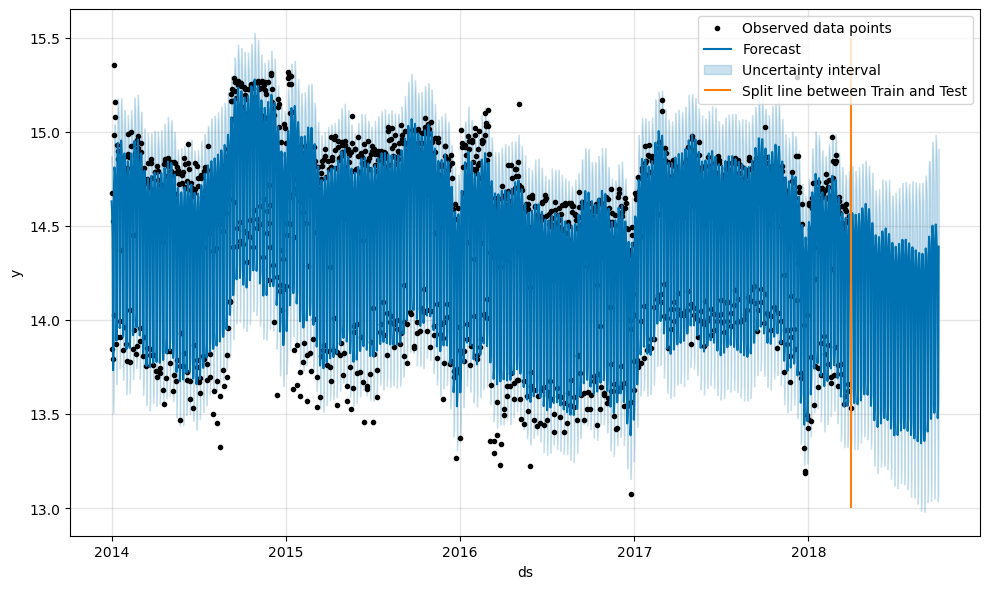

In [24]:
plt.figure(figsize=(20,8))
fig = model.plot(results)
plt.vlines(pd.Timestamp('2018-04-01'), 13, 15.5, color='tab:orange', label='Split line between Train and Test')
plt.legend()
plt.show()

In [25]:
fig = plot_components_plotly(model, results)
fig.update_layout(title='Trend, yearly seasonality and weekly seasonality')

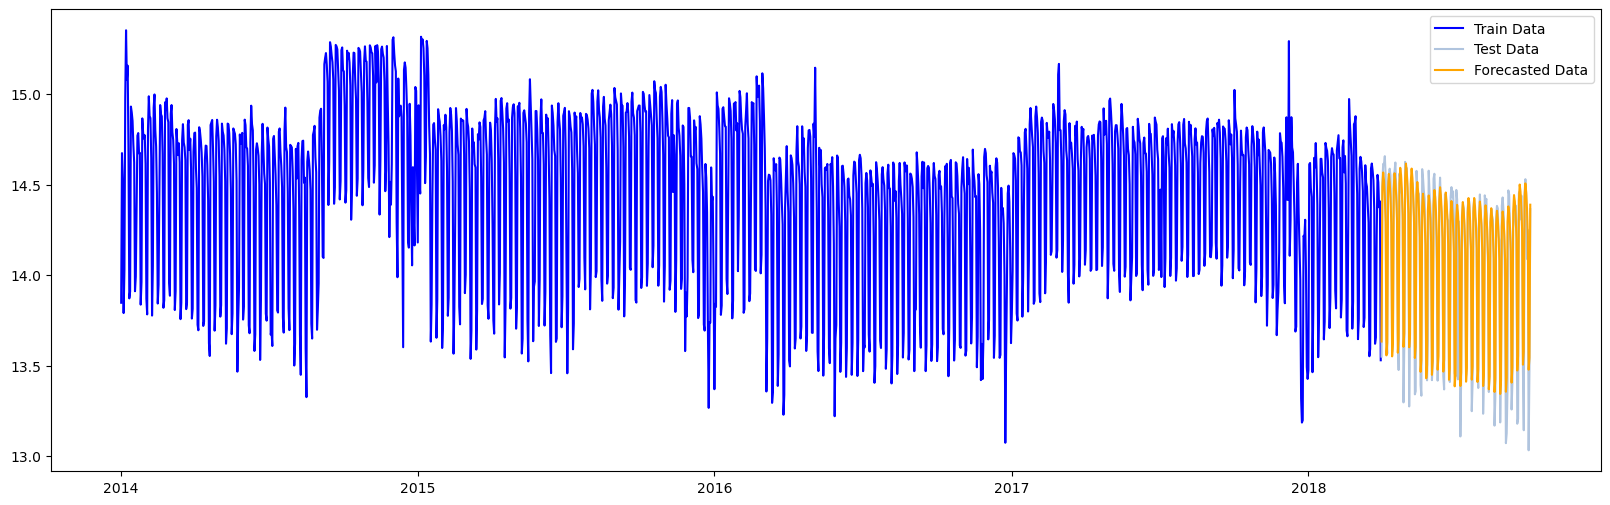

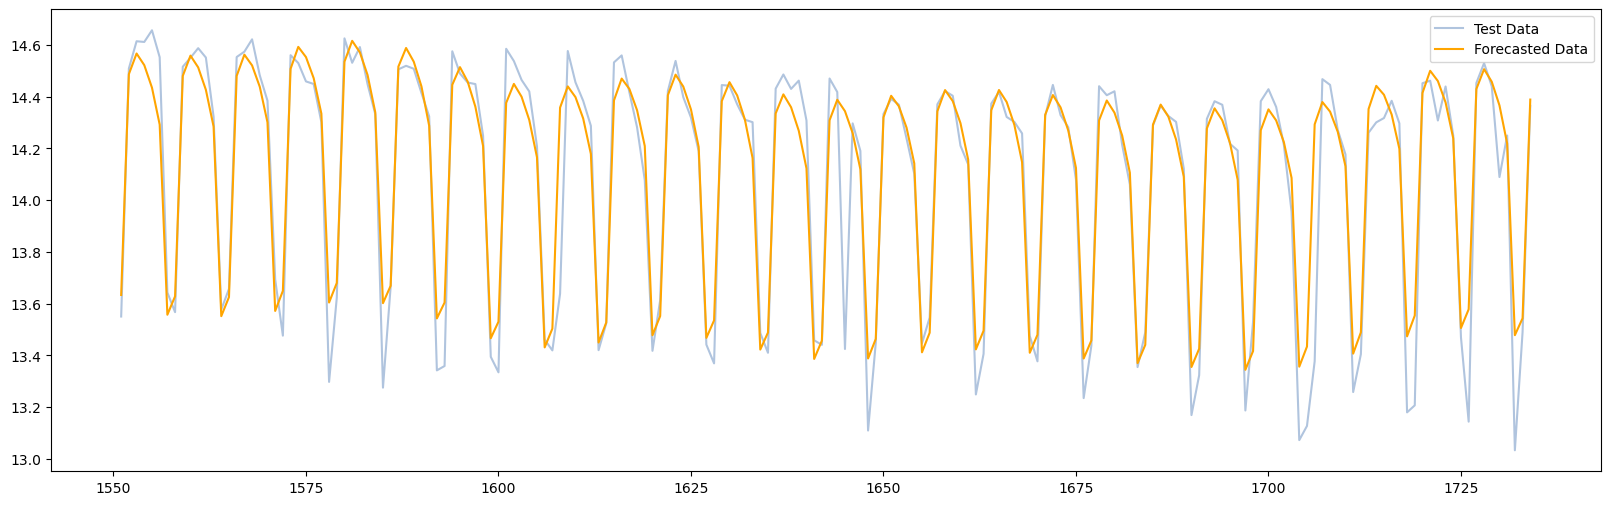

In [26]:
x_train = train_desktop['ds']
y_train = train_desktop['y']

x_test = test_desktop['ds']
y_test = test_desktop['y']

x_pred = df['ds'][-len(x_test):]
y_pred = results['yhat'][-len(y_test):]

plt.figure(figsize=(20,6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='lightsteelblue', label='Test Data')
plt.plot(x_pred, y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.plot(y_test, color='lightsteelblue', label='Test Data')
plt.plot(y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

---
# RESULTS:

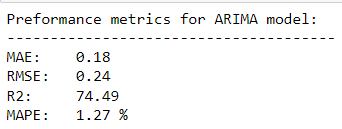
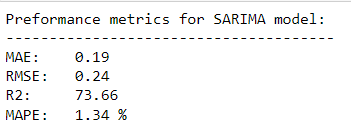
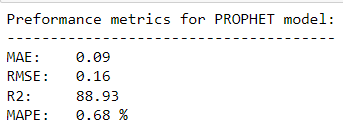


# CONCLUSION
All of the models demonstrated **EXCELLENT** forecasting performance on the test dataset, as evidenced by both visual representation of the predictions and the comprehensive evaluation metrics used.

Note: These metrics are calculated on the test split of the dataset. In a real forecasting model, such tests can only be done after the forecast period.

---